<h1>AUTHOR: UVIETOBORE JOSHUA ADJUGAH</h1>

In [3977]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3978]:
train_dataset = pd.read_csv('bank.csv', sep=';', quotechar='"', low_memory=False)
test_dataset = pd.read_csv('bank-full.csv', sep=';', quotechar='"', low_memory=False)

In [3979]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3980]:
features_train = train_dataset.drop(columns='y', axis=1)
target_train = train_dataset['y']

features_test = test_dataset.drop(columns='y', axis=1)
target_test = test_dataset['y']

In [3981]:
train_num_col = []
train_cat_col = []
for column in features_train.columns:
    if features_train[column].dtype in ['int64']:
        train_num_col.append(column)
    else:
        train_cat_col.append(column)
        
mmax = MinMaxScaler()
for col in train_num_col:
    features_train[col] = mmax.fit_transform(features_train[[col]])
    
features_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.161765,unemployed,married,primary,no,0.068455,no,no,cellular,0.600000,oct,0.024826,0.000000,0.000000,0.00,unknown
1,0.205882,services,married,secondary,no,0.108750,yes,yes,cellular,0.333333,may,0.071500,0.000000,0.389908,0.16,failure
2,0.235294,management,single,tertiary,no,0.062590,yes,no,cellular,0.500000,apr,0.059914,0.000000,0.379587,0.04,failure
3,0.161765,management,married,tertiary,no,0.064281,yes,yes,unknown,0.066667,jun,0.064548,0.061224,0.000000,0.00,unknown
4,0.588235,blue-collar,married,secondary,no,0.044469,yes,no,unknown,0.133333,may,0.073486,0.000000,0.000000,0.00,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,services,married,secondary,no,0.039999,yes,no,cellular,0.966667,jul,0.107580,0.081633,0.000000,0.00,unknown
4517,0.558824,self-employed,married,tertiary,yes,0.000000,yes,yes,unknown,0.266667,may,0.049321,0.000000,0.000000,0.00,unknown
4518,0.558824,technician,married,secondary,no,0.048429,no,no,cellular,0.600000,aug,0.048659,0.204082,0.000000,0.00,unknown
4519,0.132353,blue-collar,married,secondary,no,0.059731,no,no,cellular,0.166667,feb,0.041377,0.061224,0.243119,0.12,other


In [3982]:
test_num_col = []
test_cat_col = []
for column in features_test.columns:
    if features_test[column].dtype in ['int64']:
        test_num_col.append(column)
    else:
        test_cat_col.append(column)
        
mmax = MinMaxScaler()
for col in test_num_col:
    features_test[col] = mmax.fit_transform(features_test[[col]])
    
features_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,0.133333,may,0.053070,0.000000,0.000000,0.000000,unknown
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,may,0.030704,0.000000,0.000000,0.000000,unknown
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,0.133333,may,0.015453,0.000000,0.000000,0.000000,unknown
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,0.133333,may,0.018707,0.000000,0.000000,0.000000,unknown
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,0.133333,may,0.040260,0.000000,0.000000,0.000000,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,technician,married,tertiary,no,0.080293,no,no,cellular,0.533333,nov,0.198658,0.032258,0.000000,0.000000,unknown
45207,0.688312,retired,divorced,primary,no,0.088501,no,no,cellular,0.533333,nov,0.092721,0.016129,0.000000,0.000000,unknown
45208,0.701299,retired,married,secondary,no,0.124689,no,no,cellular,0.533333,nov,0.229158,0.064516,0.212156,0.010909,success
45209,0.506494,blue-collar,married,secondary,no,0.078868,no,no,telephone,0.533333,nov,0.103294,0.048387,0.000000,0.000000,unknown


In [3983]:
le = LabelEncoder()
for col in train_cat_col:
    features_train[col] = le.fit_transform(features_train[col])

features_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.161765,10,1,0,0,0.068455,0,0,0,0.600000,10,0.024826,0.000000,0.000000,0.00,3
1,0.205882,7,1,1,0,0.108750,1,1,0,0.333333,8,0.071500,0.000000,0.389908,0.16,0
2,0.235294,4,2,2,0,0.062590,1,0,0,0.500000,0,0.059914,0.000000,0.379587,0.04,0
3,0.161765,4,1,2,0,0.064281,1,1,2,0.066667,6,0.064548,0.061224,0.000000,0.00,3
4,0.588235,1,1,1,0,0.044469,1,0,2,0.133333,8,0.073486,0.000000,0.000000,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,7,1,1,0,0.039999,1,0,0,0.966667,5,0.107580,0.081633,0.000000,0.00,3
4517,0.558824,6,1,2,1,0.000000,1,1,2,0.266667,8,0.049321,0.000000,0.000000,0.00,3
4518,0.558824,9,1,1,0,0.048429,0,0,0,0.600000,1,0.048659,0.204082,0.000000,0.00,3
4519,0.132353,1,1,1,0,0.059731,0,0,0,0.166667,3,0.041377,0.061224,0.243119,0.12,1


In [3984]:
for col in test_cat_col:
    features_test[col] = le.fit_transform(features_test[col])

features_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.519481,4,1,2,0,0.092259,1,0,2,0.133333,8,0.053070,0.000000,0.000000,0.000000,3
1,0.337662,9,2,1,0,0.073067,1,0,2,0.133333,8,0.030704,0.000000,0.000000,0.000000,3
2,0.194805,2,1,1,0,0.072822,1,1,2,0.133333,8,0.015453,0.000000,0.000000,0.000000,3
3,0.376623,1,1,3,0,0.086476,1,0,2,0.133333,8,0.018707,0.000000,0.000000,0.000000,3
4,0.194805,11,2,3,0,0.072812,0,0,2,0.133333,8,0.040260,0.000000,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,9,1,2,0,0.080293,0,0,0,0.533333,9,0.198658,0.032258,0.000000,0.000000,3
45207,0.688312,5,0,0,0,0.088501,0,0,0,0.533333,9,0.092721,0.016129,0.000000,0.000000,3
45208,0.701299,5,1,1,0,0.124689,0,0,0,0.533333,9,0.229158,0.064516,0.212156,0.010909,2
45209,0.506494,1,1,1,0,0.078868,0,0,1,0.533333,9,0.103294,0.048387,0.000000,0.000000,3


In [3985]:
model = DecisionTreeClassifier(
                            criterion='entropy',
                            max_depth=13,
                            min_samples_split=25,
                            min_samples_leaf=4,
                            random_state=42
                            )

In [3986]:
model.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=4,
                       min_samples_split=25, random_state=42)

In [3987]:
accuracy = model.score(features_test, target_test)* 100

In [3988]:
print(f' The accuarcy is {accuracy_score(target_test, model.predict(features_test)) * 100:.2f}%')

 The accuarcy is 89.54%


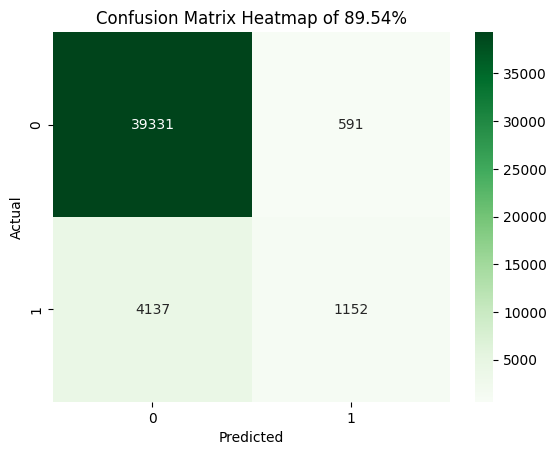

In [3989]:
conf = confusion_matrix(target_test, model.predict(features_test))

sns.heatmap(conf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix Heatmap of {accuracy:.2f}%")
plt.show()

In [3990]:
print(classification_report(target_test, model.predict(features_test)))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     39922
         yes       0.66      0.22      0.33      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.60      0.64     45211
weighted avg       0.88      0.90      0.87     45211



In [3991]:
print(cross_val_score(model, features_train, target_train, cv=5))
cross_val_score(model, features_train, target_train, cv=5).mean()

[0.8839779  0.87942478 0.88163717 0.88163717 0.87942478]


0.8812203588715593

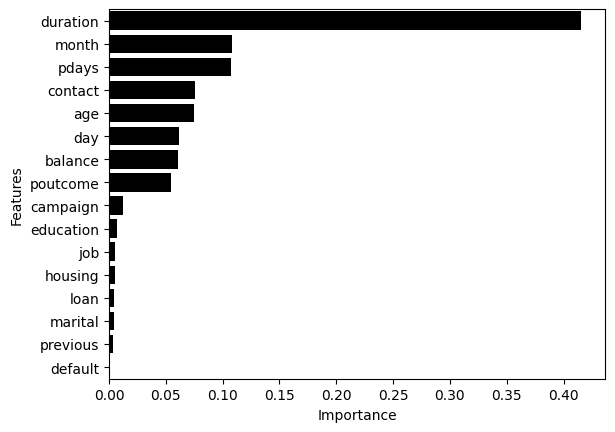

In [3992]:
impo = model.feature_importances_
feat = features_train.columns

df_impo = pd.DataFrame({'Features':feat, 'Importance':impo}).sort_values(by='Importance', ascending=False)
sns.barplot(df_impo, x='Importance', y='Features', color='Black')
plt.show()